# METODE CRISP-DM

# 1. Bussiness Understanding
Tahap Bussiness Understanding bertujuan untuk memahami bisnis yang berhubungan dengan Credit Card di Jerman, yang nantinya akan dibuat model clustering untuk segmentasi customer atau nasabah.

Pihak Bank atau penerbit Credit Card (Kartu Kredit) memiliki banyak nasabah dari berbagai kalangan. Dengan usia, pekerjaan, dan kehidupannya yang bermacam-macam itu pasti memiliki karakteristik tersendiri dalam mengajukan pinjaman. 
Pelanggan atau nasabah bisa ditentukan menjadi nasabah yang baik atau yang buruk, maupun low credit risk atau high credit risk yang nantinya dapat memengaruhi keputusan pemberian pinjaman oleh pihak Bank atau penerbit Kartu Kredit. Untuk mengidentifikasi credit rik, Bank atau penerbit Kartu Kredit dapat melakukan analisis terhadap profil pelanggan berdasarkan berbagai faktor seperti usia, pekerjaan, jumlah kredit yang dipinjam, durasi peminjaman dan tujuan peminjaman. Selain itu juga pihak bank dapat memutuskan strategi apa yang cocok untuk kalangan nasabah tertentu agar dapat lebih dipercaya dan tidak menghilang atau memutus hubungan dengan pihak bank.

Penting bagi Bank atau penerbit Kartu Kredit untuk melakukan evaluasi yang cermat terhadap nasabah yang ada guna meminimalkan risiko kredit dan menjaga kestabilan keuangan perusahaan.

Dataset diambil dari Kaggle (https://www.kaggle.com/datasets/uciml/german-credit)

# 2. Data Understanding
Tahap Data Understanding bertujuan untuk menjelaskan setiap data yang dikumpulkan beserta propertinya.

Data yang dikumpulkan meliputi Age (Usia), Sex (Jenis Kelamin), Job (Pekerjaan), Housing (Rumah), Saving accounts (Rekening tabungan), Checking account (Rekening giro), Credit amount (Jumlah kredit/pinjaman), Duration (Durasi), dan Purpose (Tujuan).

- Age                  int64 = Usia Pelanggan/Nasabah
- Sex                 object = Jenis Kelamin Pelanggan/Nasabah
- Job                  int64 = Tingkat pekerjaan (0 - Tidak memiliki keterampilan dan tidak tetap, 1 - tidak berketerampilan tapi punya kerjaan tetap, 2 - berketerampilan, 3 - Sangat terampil/ahli)
- Housing             object = Jenis tempat tinggal yang ditinggali (Rumah sendiri, Kontrak, Menumpang)
- Saving accounts     object = Jenis/nilai rekening tabungan yang dimiliki
- Checking account    object = Jenis/nilai rekening giro yang dimilki
- Credit amount        int64 = Jumlah pinjaman yang diajukan dalam DM (Deutschmark, Mata uang Jerman)
- Duration             int64 = Durasi/jangka waktu peminjaman dalam Bulan
- Purpose             object = Tujuan peminjaman

Dari data-data tersebut, data yang nantinya akan digunakan dalam model clustering adalah data yang bertipe numerik yaitu Age, Credit Amount dan Duration.

# Import Library yang dibutuhkan

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans


# Membaca Dataset

In [54]:
df = pd.read_csv('german_credit_data.csv')

In [55]:
df.head()

,Row,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [56]:
df.dtypes

Row                  int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

# 3. Data Preparation

Mengecek apakah ada data yang bernilai null atau NaN.

In [57]:
df.isnull().sum()

Row                   0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Diketahui ada 2 kolom yang datanya berisi nilai null. Selanjutnya kita akan melihat data yang berisi nilai null atau NaN tersebut.

In [58]:
print('Content of Saving accounts:', df['Saving accounts'].unique())
print('Content of Checking account:', df['Checking account'].unique())

Content of Saving accounts: [nan 'little' 'quite rich' 'rich' 'moderate']
Content of Checking account: ['little' 'moderate' nan 'rich']


Karena data yang bernilai null tidak dapat digunakan, maka data tersebut harus dirubah terlebih dahulu. Disini saya ubah dengan 'None'.

In [59]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')

<Axes: >

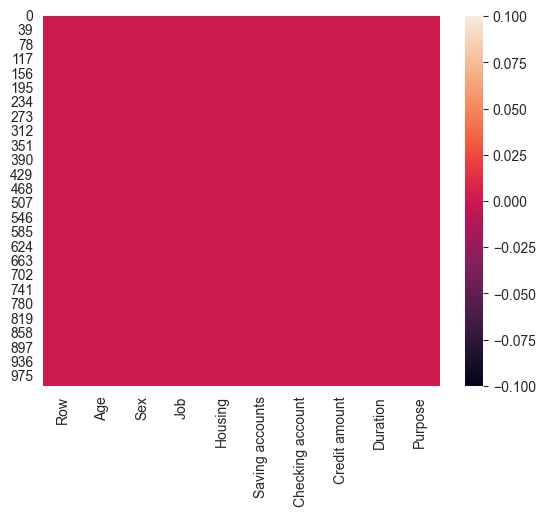

In [60]:
sns.heatmap(df.isnull())

Mengetahui deskripsi statistik dataset.

In [61]:
df.describe()

,Row,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Visualisasi Data

Mengetahui/menghitung plot untuk data yang berjenis kategori

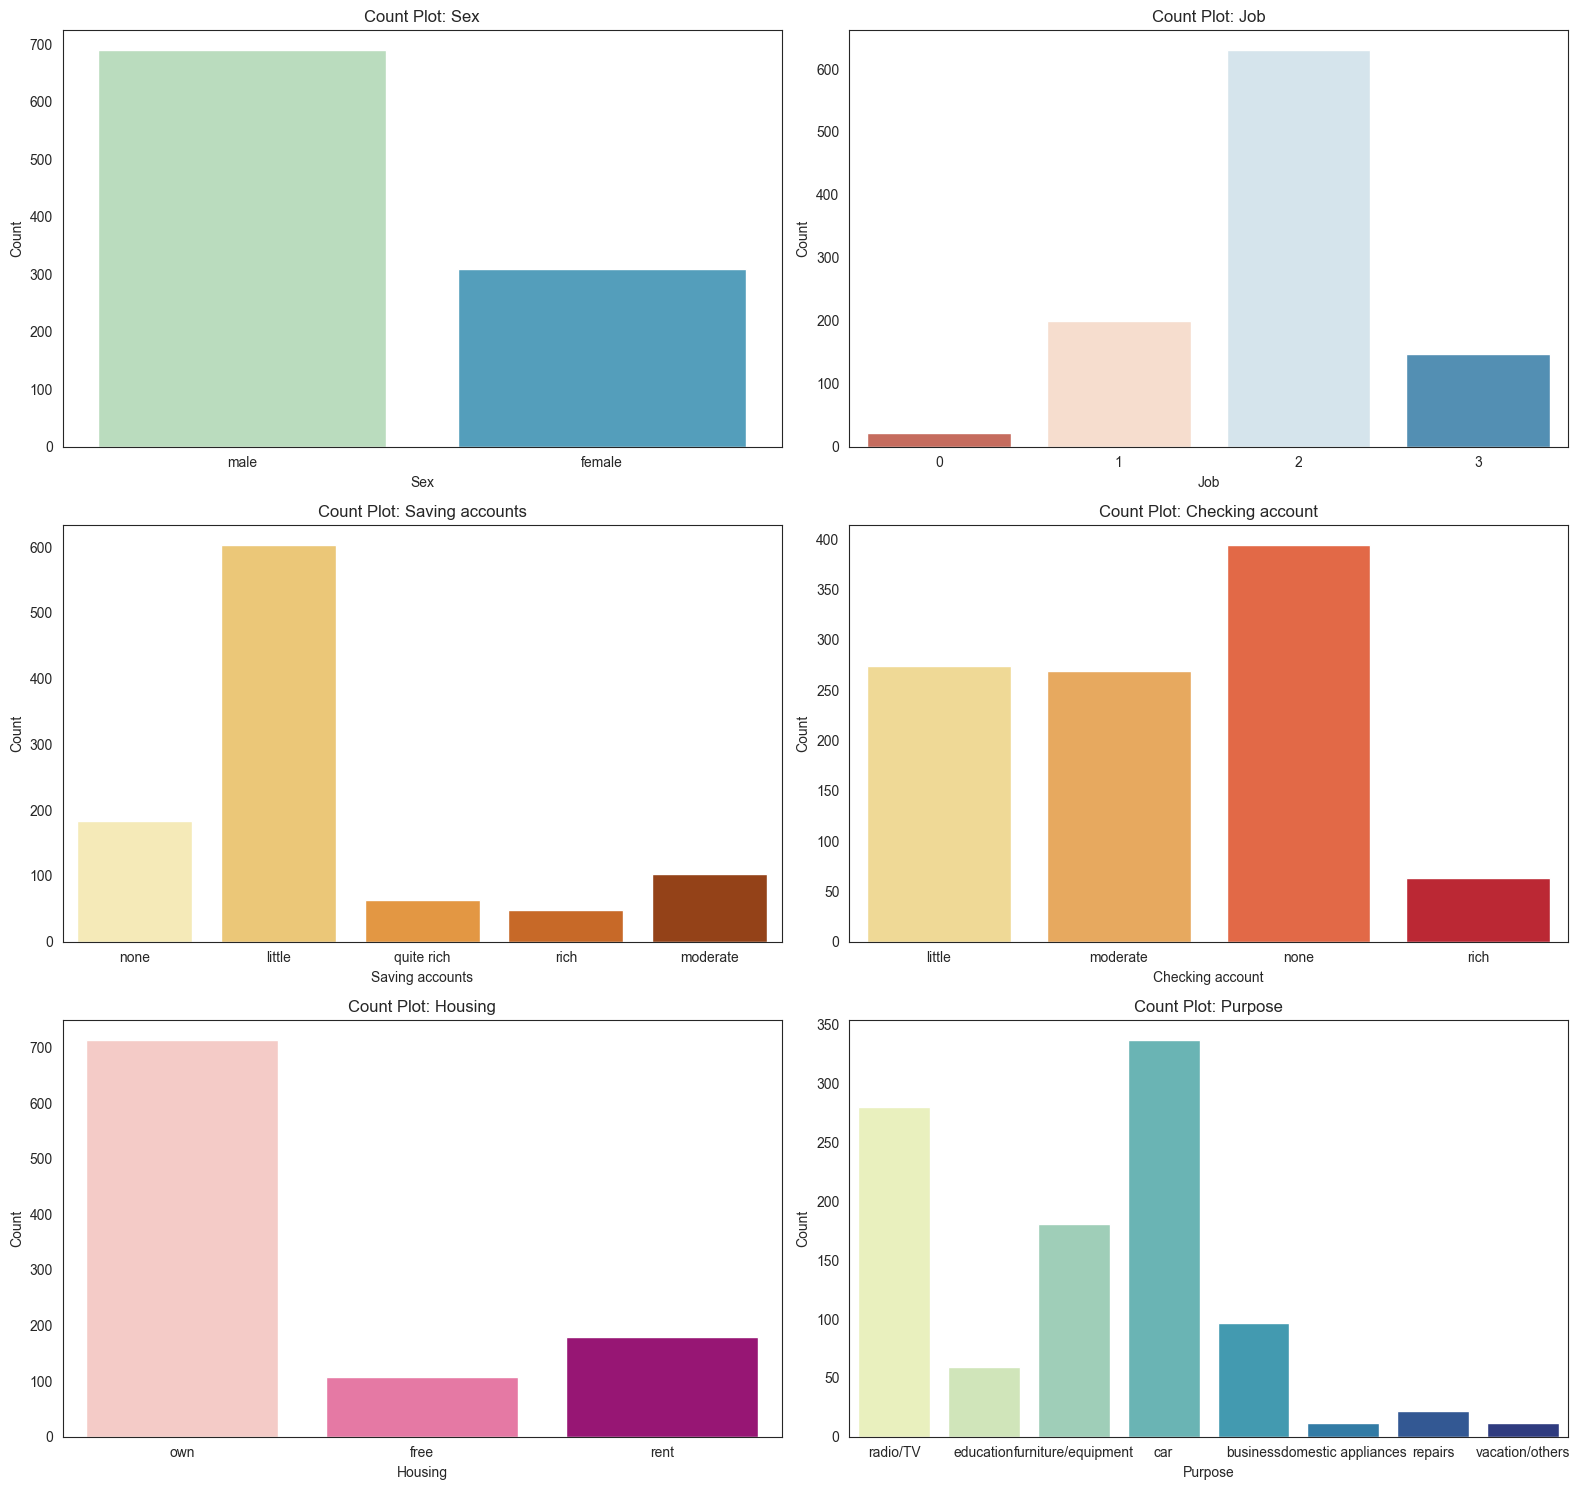

In [62]:
sns.set_style('white') 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,15))
axes = axes.flatten()

palettes = {
    'Sex':'GnBu',
    'Job':'RdBu',
    'Saving accounts': 'YlOrBr',
    'Checking account': 'YlOrRd',
    'Housing': 'RdPu',
    'Purpose': 'YlGnBu'
}

categories = ['Sex', 'Job', 'Saving accounts', 'Checking account', 'Housing', 'Purpose']
for i, category in enumerate(categories):
    sns.countplot(x=category, data=df, ax=axes[i], palette=palettes[category])
    axes[i].set_title(f'Count Plot: {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Mengetahui korelasi antara Age (Umur), Credit Amount (Jumlah Kredit), dan Duration (Durasi)

<Axes: >

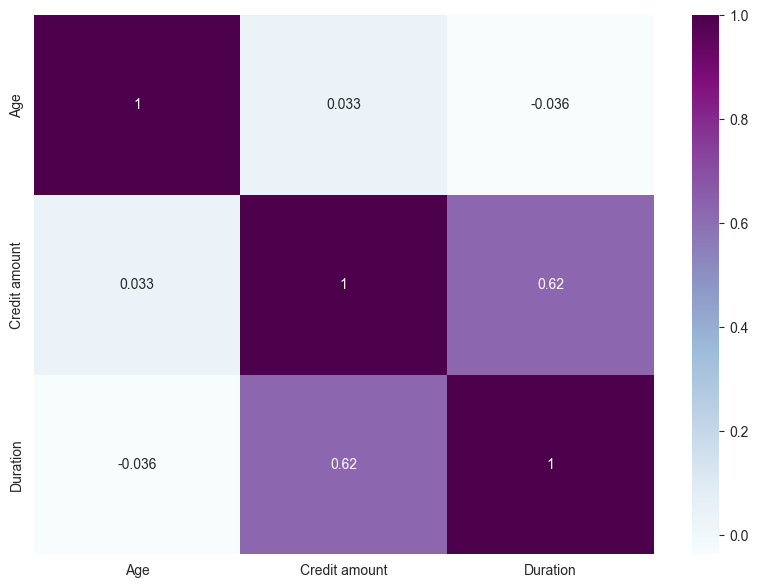

In [63]:
fig = plt.subplots(figsize=(10,7))
data = df[['Age','Credit amount', 'Duration']]
sns.heatmap(data.corr(), annot = True, cmap='BuPu')

# 4. Seleksi Data

Karena nama kolom 'Credit Amount' terlalu panjang dan dapat menyebabkan kendala di proses kedepannya, maka saya ubah nama kolom tersebut menjadi 'Credit'.

In [64]:
df.rename(index=str, columns={
    'Credit amount': 'Credit'
}, inplace=True)

Data yang akan digunakan adalah data yang berjenis numerik yaitu Age, Credit, dan Duration.

In [65]:
features = ['Age', 'Credit', 'Duration']
X = df[features]

In [66]:
print(X)

     Age  Credit  Duration
0     67    1169         6
1     22    5951        48
2     49    2096        12
3     45    7882        42
4     53    4870        24
..   ...     ...       ...
995   31    1736        12
996   40    3857        30
997   38     804        12
998   23    1845        45
999   27    4576        45

[1000 rows x 3 columns]


# Menentukan Jumlah Cluster dengan Elbow

Untuk mengetahui jumlah Cluster yang cocok dan sesuai dengan data, maka saya menentukan jumlah cluster dengan metode Elbow point.

c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


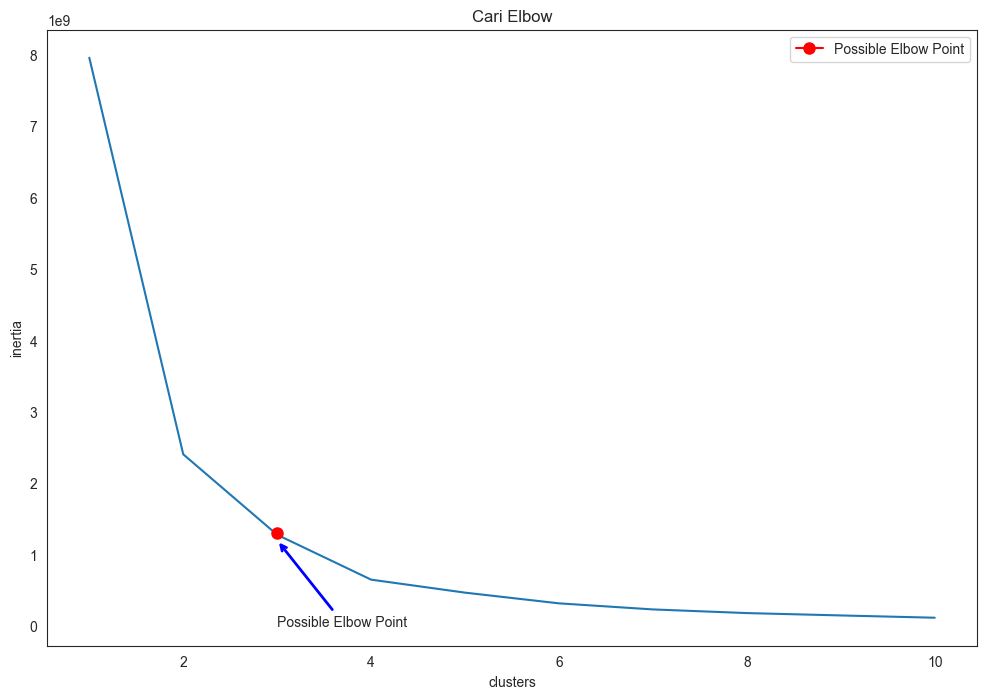

In [67]:
clusters=[]
for i in range(1,11):
    km = KMeans (n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Find the elbow point
elbow_point = None
for i in range(1, len(clusters) - 1):
    slope = clusters[i] - clusters[i + 1]
    if elbow_point is None or slope < elbow_point[1]:
        elbow_point = (i + 1, slope)

# Mark the elbow point on the plot
plt.plot(3, 1300000000, marker='o', markersize=8, color='red', label='Possible Elbow Point')
plt.legend()

#Panah
ax.annotate('Possible Elbow Point', xy=(3, 1200000000), xytext=(3, 3),
                     arrowprops=dict(color='blue', arrowstyle='->', lw=2))

# Display the plot
plt.show()

Diketahui jumlah Cluster yang cocok adalah 3 atau 4. Disini saya memilih 3 cluster.

# 5. Evaluasi Data

# Proses Clustering

Clustering dengan algoritma KMeans

In [68]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

c:\Users\RIFQI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RIFQI\AppData\Local\Temp\ipykernel_12904\3206200930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Labels'] = kmean.labels_


Karena data yang digunakan ada 3, maka scatterplot yang akan digunakan adalah 3D Scatterplot.

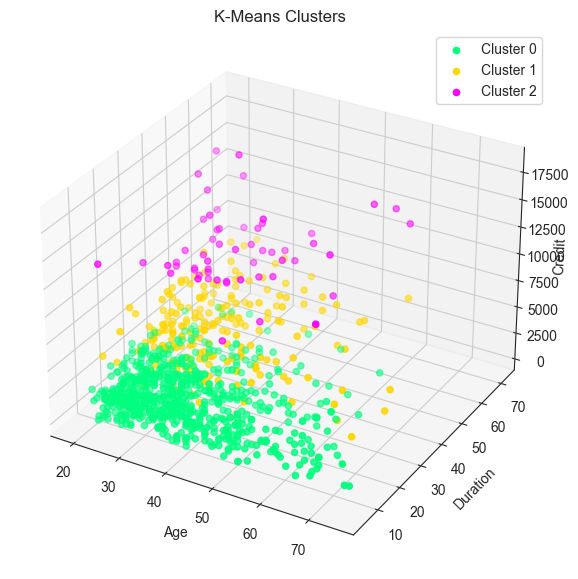

In [69]:
plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
cluster_palette = ['springgreen', 'gold', 'magenta']

for label in range(n_clust):
    ax.scatter3D(X[X['Labels'] == label]['Age'], X[X['Labels'] == label]['Duration'], X[X['Labels'] == label]['Credit'], color=cluster_palette[label], label=f'Cluster {label}')

ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Credit', rotation=90)
ax.zaxis.labelpad=-3
ax.set_title('K-Means Clusters')

ax.legend()
plt.savefig("scatter_hue", bbox_inches='tight')

In [70]:
print(X)

     Age  Credit  Duration  Labels
0     67    1169         6       0
1     22    5951        48       1
2     49    2096        12       0
3     45    7882        42       1
4     53    4870        24       1
..   ...     ...       ...     ...
995   31    1736        12       0
996   40    3857        30       0
997   38     804        12       0
998   23    1845        45       0
999   27    4576        45       1

[1000 rows x 4 columns]


Dari hasil Clustering, didapatkan 3 label yaitu 0, 1, dan 2 yang dapat diasumsikan sebagai:
- Cluster 0 : 'Regular Customer' - Customer dengan Jumlah Credit peminjaman yang tidak terlalu banyak dan tidak terlalu sedikit. Dengan durasi yang tidak terlalu panjang dan tidak terlalu pendek. Jenis Customer ini harus dipertahankan dan diberi kepercayaan agar dapat menjadi nasabah jangka panjang.

- Cluster 1 : 'Basic/Entry Level Customer' - Customer dengan rata-rata jumlah Credit yang sedikit dengan durasi yang pendek. Usia Customer kebanyakan kurang dari 30 tahun. Jenis Customer ini biasanya adalah orang dengan usia muda dan memiliki pekerjaan dan tidak banyak keperluan sehingga tidak banyak pinjaman yang diajukan. Dibutuhkan pendekatan lebih lanjut untuk customer jenis ini agar dapat membangun hubungan yang baik.

- Cluster 2: 'Valuable Customer' - Customer dengan rata-rata jumlah Credit yang cukup besar dengan durasi pinjaman yang panjang. Usia Customer mulai dari 20 tahun hingga 60 tahunan. Jenis Customer ini sangat valuable jika dapat dipertahankan untuk kedepannya, tetapi juga harus lebih diawasi dan diperhatikan karena jumlah kredit/pinjamannya yang cukup besar.

In [71]:
cluster_size = X.groupby(['Labels'], as_index=False).size()
cluster_size['Percentage'] = cluster_size['size'] / sum(cluster_size['size'])
cluster_size

,Labels,size,Percentage
0,0,736,0.736
1,1,208,0.208
2,2,56,0.056


Agar lebih jelas, masing-masing cluster dapat dibuat persentasenya.

Untuk mengetahui lebih lanjut detailnya, data yang sudah di clustering tadi dapat dikonversi menjadi file excel.

In [72]:
X.to_excel("CCCustomer_Cluster.xlsx")

# Save Model

In [73]:
import pickle

In [74]:
pickle.dump(kmean, open('cc_clustering.sav','wb'))